In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./train_v2.csv')

In [3]:
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [4]:
df['tag_list'] = df['tags'].apply(lambda x: x.split())
all_tags = list(df['tag_list'])
all_tags = sorted(list(set([i for sublist in all_tags for i in sublist])))

all_tags

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [5]:
df['tag_num'] = df['tag_list'].apply(lambda x: len(x))

In [6]:
df.head()

,image_name,tags,tag_list,tag_num
0,train_0,haze primary,"[haze, primary]",2
1,train_1,agriculture clear primary water,"[agriculture, clear, primary, water]",4
2,train_2,clear primary,"[clear, primary]",2
3,train_3,clear primary,"[clear, primary]",2
4,train_4,agriculture clear habitation primary road,"[agriculture, clear, habitation, primary, road]",5


## What are the number of tags assigned to each tile

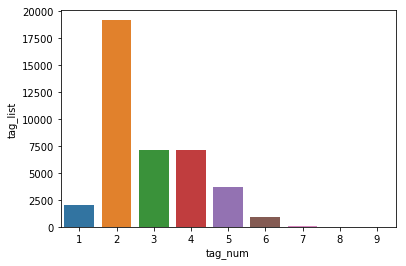

In [14]:
tag_counts = df.groupby('tag_num').count().reset_index()
sns.barplot(x='tag_num', y='tag_list', data=tag_counts)

## What are the most common tag?

In [17]:
df_tags = df.tag_list.apply(pd.Series)

In [32]:
all_tag_values = []
all_tags_dict = {k: 0 for k in all_tags}
for i, row in df.iterrows():
    for tag in row['tag_list']:
        all_tags_dict[tag] += 1
all_tags_dict

{'agriculture': 12315,
 'artisinal_mine': 339,
 'bare_ground': 862,
 'blooming': 332,
 'blow_down': 101,
 'clear': 28431,
 'cloudy': 2089,
 'conventional_mine': 100,
 'cultivation': 4547,
 'habitation': 3660,
 'haze': 2697,
 'partly_cloudy': 7261,
 'primary': 37513,
 'road': 8071,
 'selective_logging': 340,
 'slash_burn': 209,
 'water': 7411}

           tag       num
0      primary  0.926727
1        clear  0.702364
2  agriculture  0.304232
3         road  0.199387
4        water  0.183083


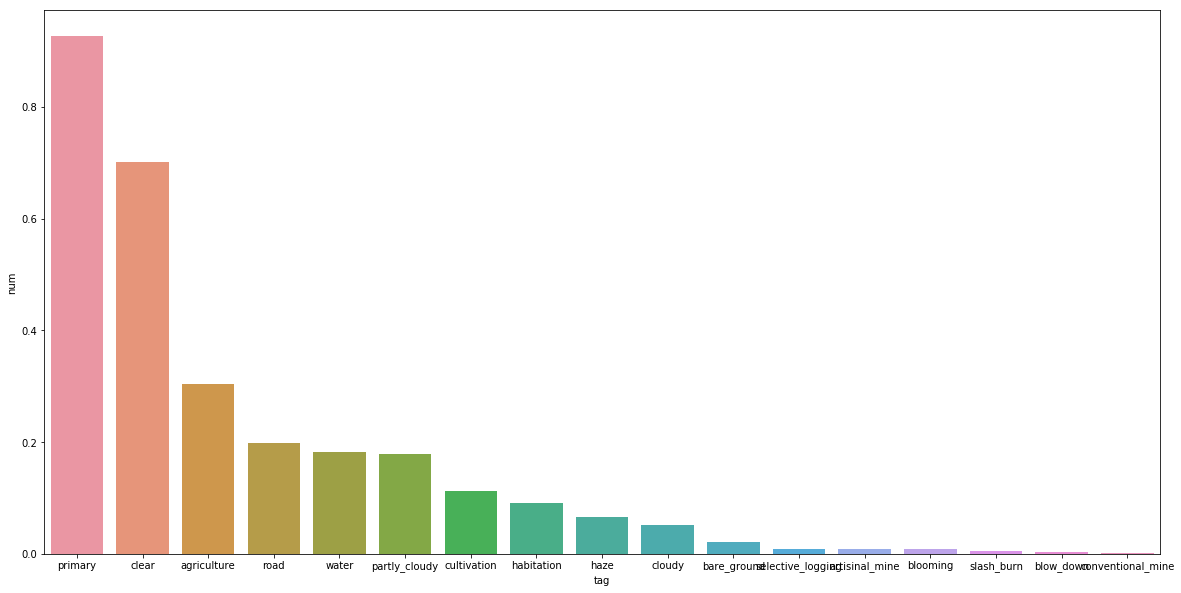

In [37]:
sorted_tags, sorted_tag_nums = zip(*sorted(zip(all_tags_dict.keys(), all_tags_dict.values()), key=lambda x: x[1], reverse=True))
tags_df = pd.DataFrame()
tags_df['tag'] = sorted_tags
tags_df['num'] = sorted_tag_nums
tags_df.sort_values('num', ascending=False, inplace=True)
tags_df['num'] = tags_df['num'] / len(df)
print(tags_df.head())
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='tag', y='num', data=tags_df, ax=ax)